## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

21880    25000
21887    10000
21915    20000
21921    25000
21924    25000
         ...  
72300    25000
72310     1000
72367    10000
72372    80000
72374    25000
Name: income_clean, Length: 7508, dtype: int64


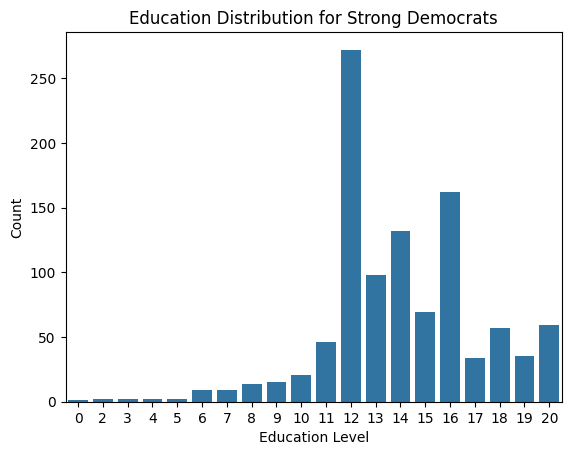

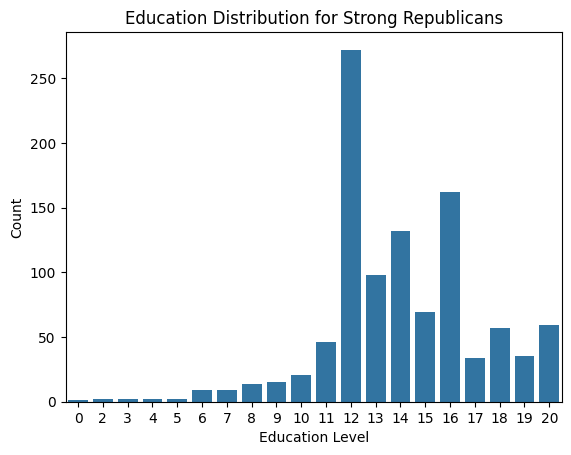

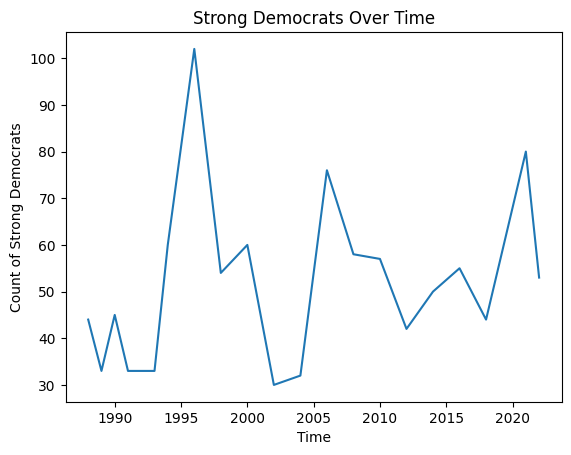

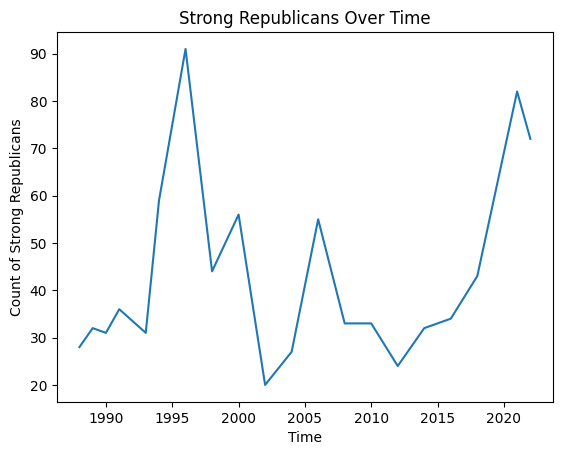

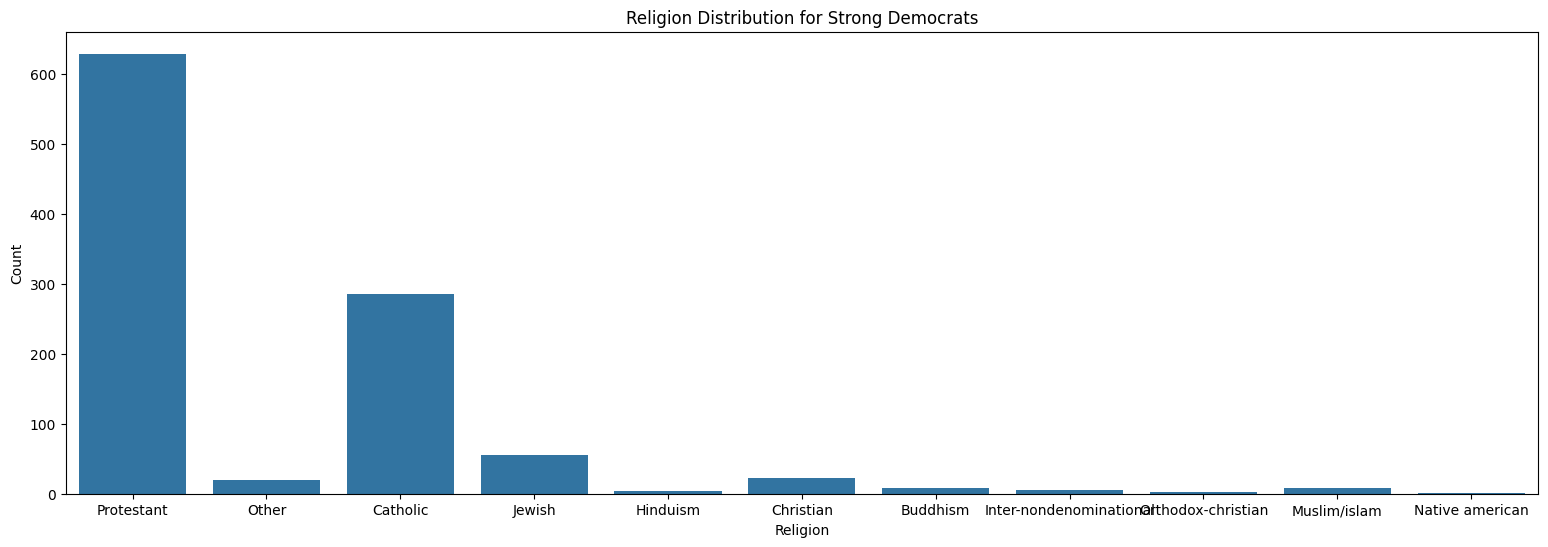

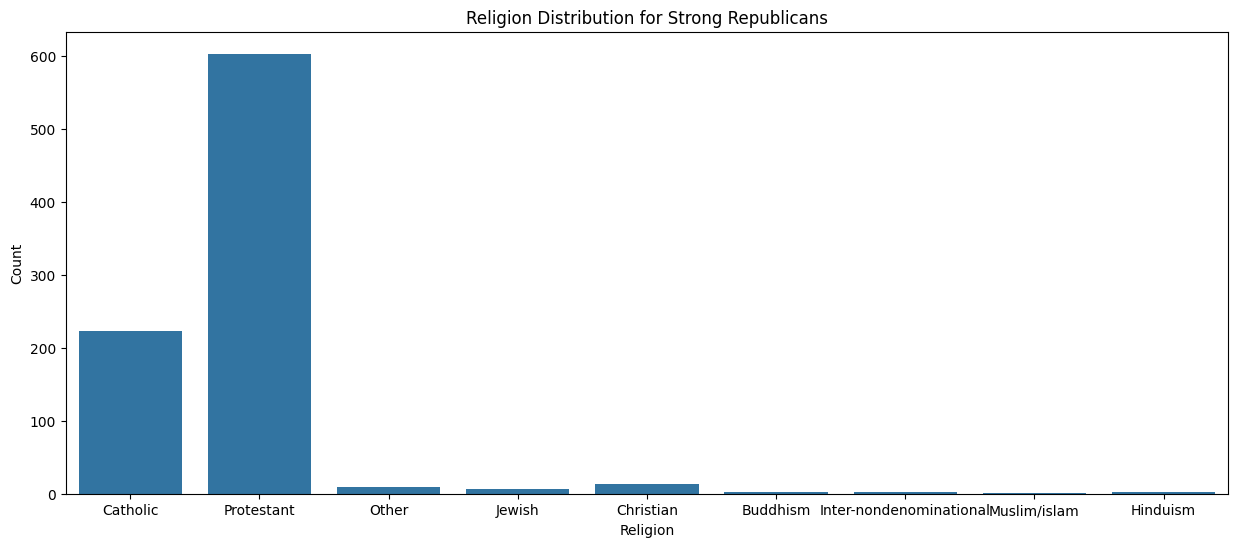

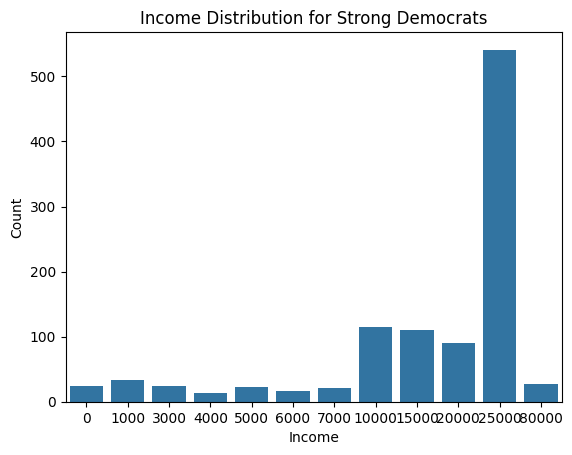

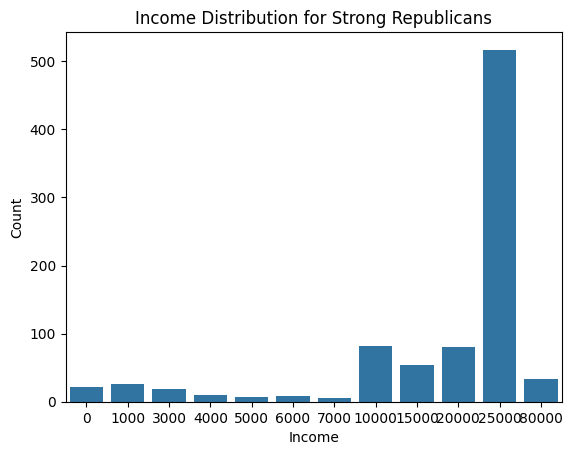

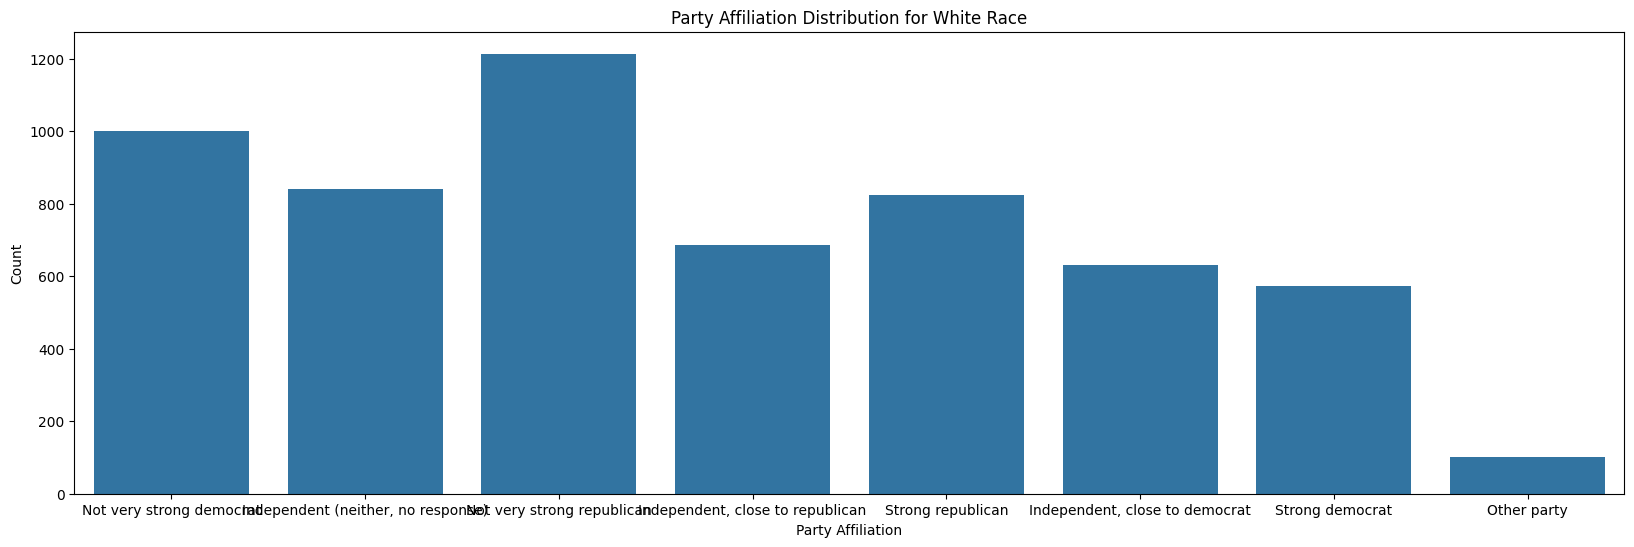

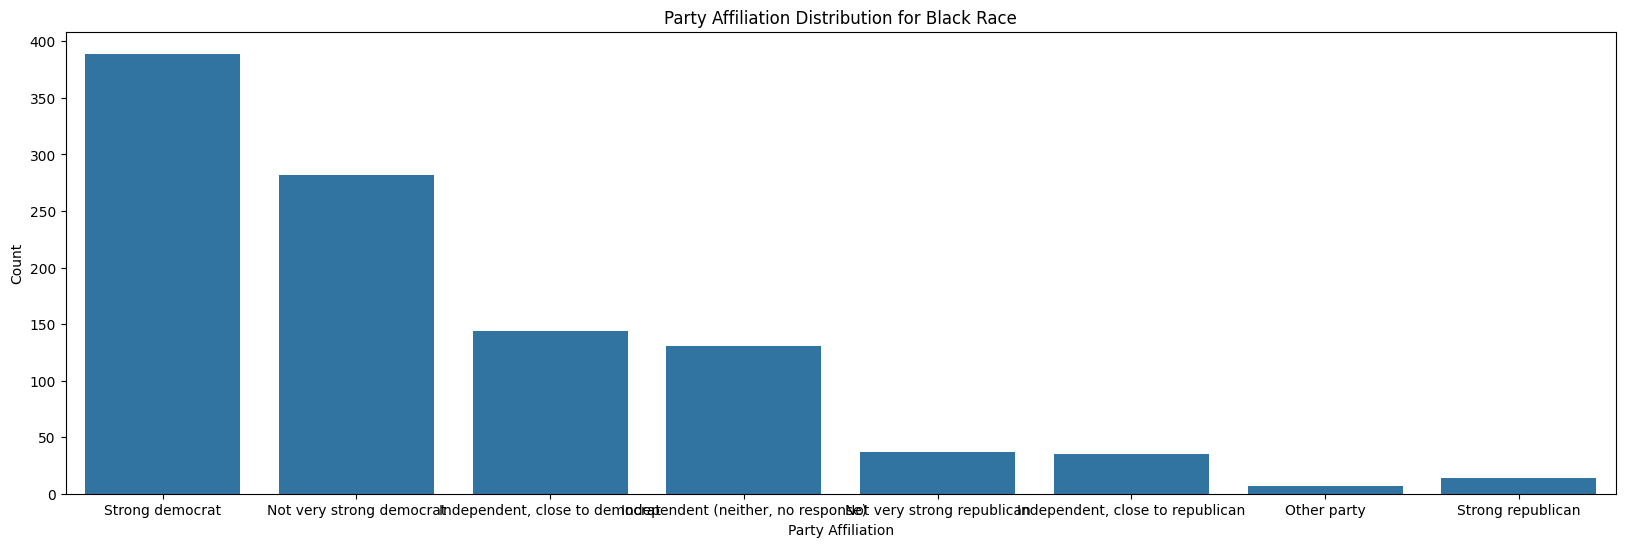

In [ ]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns

df = pd.read_excel("GSS.xlsx")  

# replace all instances of inapplicable, do not knows, refuseds so that i am only looking at data from people that actually responded
df.replace(".i:  Inapplicable", pd.NA, inplace=True)
df.replace(".d:  Do not Know/Cannot Choose", pd.NA, inplace=True)
df.replace(".r:  Refused", pd.NA, inplace=True)
df.replace(".n:  No answer", pd.NA, inplace=True)
df.replace(".s:  Skipped on Web", pd.NA, inplace=True)
df.dropna(inplace=True)

# define the mapping of education levels to numeric values to clean up x axis values
education_mapping = {
    'No formal schooling': 0,
    '1st grade': 1,
    '2nd grade': 2,
    '3rd grade': 3,
    '4th grade': 4,
    '5th grade': 5,
    '6th grade': 6,
    '7th grade': 7,
    '8th grade': 8,
    '9th grade': 9,
    '10th grade': 10,
    '11th grade': 11,
    '12th grade': 12,
    '1 year of college': 13,  
    '2 years of college': 14, 
    '3 years of college': 15,
    '4 years of college': 16,  
    '5 years of college': 17,
    '6 years of college': 18,
    '7 years of college': 19,
    '8 or more years of college': 20,
}

income_mapping = {
    'LT $1000': 0,
    '$1000 TO 2999': 1000,
    '$3000 TO 3999': 3000,
    '$4000 TO 4999': 4000,
    '$5000 TO 5999': 5000,
    '$6000 TO 6999': 6000,
    '$7000 TO 7999': 7000,
    '$8000 TO 9999': 80000,
    '$10000 - 14999': 10000,
    '$15000 - 19999': 15000,
    '$20000 - 24999': 20000,
    '$25000 OR MORE': 25000
}


# apply the mapping to the educ column
df['educ_clean'] = df['educ'].map(education_mapping)
df['income_clean'] = df['rincome'].map(income_mapping)
print(df['income_clean'])

# filter the data for strong Democrats 
strong_democrats = df[df['partyid'] == 'Strong democrat']
# histogram for categorial data
sns.countplot(x='educ_clean', data=strong_democrats)
# title and labels
plt.title('Education Distribution for Strong Democrats')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# filter the data for strong Republicans
strong_republicans = df[df['partyid'] == 'Strong republican']
# histogram for categorial data
sns.countplot(x='educ_clean', data=strong_democrats)
# title and labels
plt.title('Education Distribution for Strong Republicans')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# count the number of strong democrats that year
strong_democrats_count = strong_democrats.groupby('year').size().reset_index(name='strong_democrat_count')
# line plot to visualize trend over time
fig = sns.lineplot(data=strong_democrats_count, x='year', y='strong_democrat_count')

# title and labels
fig.set(title="Strong Democrats Over Time", 
        xlabel='Time', ylabel='Count of Strong Democrats')

# Show the plot
plt.show()

# count the number of strong republicans that year
strong_republicans_count = strong_republicans.groupby('year').size().reset_index(name='strong_republicans_count')
# line plot to visualize trend over time
fig = sns.lineplot(data=strong_republicans_count, x='year', y='strong_republicans_count')

# title and labels
fig.set(title="Strong Republicans Over Time", 
        xlabel='Time', ylabel='Count of Strong Republicans')

# Show the plot
plt.show()

# Religion distribution for Strong Democrats
plt.figure(figsize=(19, 6))
sns.countplot(x='relig', data=strong_democrats)
plt.title('Religion Distribution for Strong Democrats')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.show()

# Religion distribution for Strong Republicans
plt.figure(figsize=(15, 6))
sns.countplot(x='relig', data=strong_republicans)
plt.title('Religion Distribution for Strong Republicans')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.show()


sns.countplot(x='income_clean', data=strong_democrats)
plt.title('Income Distribution for Strong Democrats')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

sns.countplot(x='income_clean', data=strong_republicans)
plt.title('Income Distribution for Strong Republicans')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# only get white as race 
white_race_data = df[df['race'] == 'White']

# countplot for party affiliation based on race = White
plt.figure(figsize=(20, 6))
sns.countplot(x='partyid', data=white_race_data)
plt.title('Party Affiliation Distribution for White Race')
plt.xlabel('Party Affiliation')
plt.ylabel('Count')
plt.show()


# only get black as race 
black_race_data = df[df['race'] == 'Black']

# countplot for party affiliation based on race = Black
plt.figure(figsize=(20, 6))
sns.countplot(x='partyid', data=black_race_data)
plt.title('Party Affiliation Distribution for Black Race')
plt.xlabel('Party Affiliation')
plt.ylabel('Count')
plt.show()
